# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [51]:
import pandas as pd
import numpy as np

In [1]:
df = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests
import os
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [3]:
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [4]:
df2 = pd.read_csv('image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [11]:
# Create tweet_json.txt 
# use the api created above to retrive the tweets based on tweet_id column from df

missing_tweets = [] #list for unretrieved tweetIDs 

with open('tweet_json.txt', 'a', encoding='utf8') as file:
    for tweet_id in df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet, file)
            file.write('\n')
            
        except Exception as err_msg:
            print(str(tweet_id)+ " - " + str(err_msg))
            missing_tweets.append(tweet_id)

Rate limit reached. Sleeping for: 223
888202515573088257 - [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 - [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 - [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 - [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 - [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 - [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 - [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 - [{'code': 144, 'message': 'No status found with that ID.'}]
856330835276025856 - [{'code': 34, 'message': 'Sorry, that page does not exist.'}]
851953902622658560 - [{'code': 144, 'message': 'No status found with that ID.'}]
851861385021730816 - [{'code': 34, 'message': 'Sorry, that page does not exist.'}]
845459076796616705 - [{'code': 144, 'message': 'No status found wit

In [5]:
import json

In [ ]:
# Re-run the process above for the tweetIDs in the missing_tweets list. 

missing_tweets2 = []

with open('tweet_json.txt', 'a', encoding='utf8') as file:
    for tweet_id in missing_tweets:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet, file)
            file.write('\n')
            
        except Exception as err_msg:
            print(str(tweet_id)+ " - " + str(err_msg))
            missing_tweets2.append(tweet_id)

#### tweepy code source: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

In [6]:
# Save tweet_json.txt to a df

# store the tweets from the json file

tweet_data = []

json_file = open('tweet_json.txt', "r")

for ln in json_file:
    try:
        twt = json.loads(ln)
        tweet_data.append(twt)
    except:
        continue
        
json_file.close()

In [7]:
df3 = pd.DataFrame()

df3['tweet_id'] = list(map(lambda tweet: tweet['id'], tweet_data))
df3['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_data))
df3['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_data))
df3['created_at'] = list(map(lambda tweet: tweet['created_at'], tweet_data))
df3['full_text'] = list(map(lambda tweet: tweet['full_text'], tweet_data))

In [8]:
df3.head()

,tweet_id,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,7104,34220,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,5350,29673,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,3521,22346,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,7303,37395,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,7850,35737,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [12]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [28]:
df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1386,700518061187723268,NaN,NaN,2016-02-19 03:11:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vincent. He's the man your girl is wit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700518061...,10,10,Vincent,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,a,None,None,None,None
357,830173239259324417,NaN,NaN,2017-02-10 21:54:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Kyro. He's a Stratocumu...,8.092201e+17,4.196984e+09,2016-12-15 02:14:29 +0000,https://twitter.com/dog_rates/status/809220051...,12,10,Kyro,None,None,None,None
48,882992080364220416,NaN,NaN,2017-07-06 15:58:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He wasn't ready for the first p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882992080...,13,10,Rusty,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
2095,670764103623966721,NaN,NaN,2015-11-29 00:39:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Vincent. He's a wild Adderall Cayenne. Sh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670764103...,10,10,Vincent,None,None,None,None
1269,709519240576036864,NaN,NaN,2016-03-14 23:19:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vince. He's a Gregorian Flapjeck. Whit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709519240...,9,10,Vince,None,None,None,None
1839,675891555769696257,NaN,NaN,2015-12-13 04:14:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Donny. He's summoning the demon monste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675891555...,6,10,Donny,None,None,None,None
364,829141528400556032,NaN,NaN,2017-02-08 01:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Malcolm. He goes from sneaky tongue sl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829141528...,12,10,Malcolm,None,None,None,None
706,785533386513321988,NaN,NaN,2016-10-10 17:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dallas. Her tongue is ridiculous. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785533386...,11,10,Dallas,None,None,None,None


In [20]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
df['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [23]:
df['tweet_id'].duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
2354    False
2355    False
Name: tweet_id, Length: 2356, dtype: bool

In [24]:
pd.set_option('display.max_colwidth', -1)
df['source']

0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
5       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
6       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
7       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
8       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
9       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
10      <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

#### Source for set_option: https://stackoverflow.com/questions/25351968/how-can-i-display-full-non-truncated-dataframe-information-in-html-when-conver

In [24]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
df3

,tweet_id,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,7104,34220,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,5350,29673,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,3521,22346,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,7303,37395,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,7850,35737,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...
5,891087950875897856,2637,18039,Sat Jul 29 00:08:17 +0000 2017,Here we have a majestic great white breaching ...
6,890971913173991426,1687,10504,Fri Jul 28 16:27:12 +0000 2017,Meet Jax. He enjoys ice cream so much he gets ...
7,890729181411237888,15972,57495,Fri Jul 28 00:22:40 +0000 2017,When you watch your owner call another dog a g...
8,890609185150312448,3662,24842,Thu Jul 27 16:25:51 +0000 2017,This is Zoey. She doesn't want to be one of th...
9,890240255349198849,6170,28311,Wed Jul 26 15:59:51 +0000 2017,This is Cassie. She is a college pup. Studying...


In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 5 columns):
tweet_id          3200 non-null int64
retweet_count     3200 non-null int64
favorite_count    3200 non-null int64
created_at        3200 non-null object
full_text         3200 non-null object
dtypes: int64(3), object(2)
memory usage: 125.1+ KB


In [22]:
all_columns = pd.Series(list(df) + list(df2) + list(df3))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Quality issues
#### df1
1. The in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,	retweeted_status_user_id, and the	retweeted_status_timestamp columns all contain mostly null values and should be removed.

2. There appears to be errors in the name column, such as a, an, the. Theses errors should be replaced with None like the rest of the null values.

3. The text column will not be used for analysis and should be removed.

4. The source url contains unneccesary information <a/...> that should be removed.

#### df2
1. Some of the dog breeds in columns p1, p2, and p3 are capitized while others are all lowercase. 

2. Some of the images in p1, p2, and p3 contain images of animals other than dogs, which should be dropped from the dataset.

#### df3
1. The timestamp column in df and the created_at column in df contain the same data, so the timestamp column should be dropped along with the other unecessary columns.

#### Full dataset
1. The tweet_id column will have duplicate values in the merged dataset that will need to be droped.

2. Tweets that contain @ RT should be removed since they will not be used for analysis.

### Tidiness issues
1. The three datasets need to be merged. 

2. The dog stage is a single variable, but is currently spread across 4 columns:doggo, floofer, pupper, and puppo. These four columns should be merged into a single column.

### Other issues:
1. Make the date and time in the created_at column into two separate columns. This is not a tidiness nor a quality issue, but will be useful step for data analysis later on. 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
df_original = df.copy()
df2_original = df2.copy()
df3_original = df3.copy()

### Issue #1: 

#### Define: Merge the three dataframes

#### Code:

In [55]:
# Merge all data
df_merged = pd.merge(df, df2, how = 'inner', on = ['tweet_id'])
df_merged = pd.merge(df_merged, df3, how = 'inner', on = ['tweet_id'])
df_merged_original = df_merged.copy()

#### Test:

In [56]:
df_merged

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,7104,34220,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,7104,34220,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
2,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,7104,34219,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
3,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,5350,29673,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
4,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,5350,29673,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
5,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,5350,29673,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
6,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,3521,22346,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
7,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,3521,22346,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
8,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,3521,22345,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
9,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,7303,37395,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...


### Issue #2:

#### Define: Merge and clean the doggo, floofer, pupper, and puppo columns into a single column.

#### Code:

In [57]:
# Replace None in stage columns with empty string 
df_merged.doggo.replace('None', '', inplace=True)  
df_merged.floofer.replace('None', '', inplace=True)
df_merged.pupper.replace('None', '', inplace=True)
df_merged.puppo.replace('None', '', inplace=True)

In [58]:
# Combine stage columns.
df_merged['stage'] = df_merged.doggo + df_merged.floofer + df_merged.pupper + df_merged.puppo

In [59]:
# Clean entries with multiple dog stages

df_merged.loc[df_merged.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
df_merged.loc[df_merged.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
df_merged.loc[df_merged.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

#### Test: 

In [60]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2779 entries, 0 to 2778
Data columns (total 33 columns):
tweet_id                      2779 non-null int64
in_reply_to_status_id         27 non-null float64
in_reply_to_user_id           27 non-null float64
timestamp                     2779 non-null object
source                        2779 non-null object
text                          2779 non-null object
retweeted_status_id           134 non-null float64
retweeted_status_user_id      134 non-null float64
retweeted_status_timestamp    134 non-null object
expanded_urls                 2779 non-null object
rating_numerator              2779 non-null int64
rating_denominator            2779 non-null int64
name                          2779 non-null object
doggo                         2779 non-null object
floofer                       2779 non-null object
pupper                        2779 non-null object
puppo                         2779 non-null object
jpg_url                       27

### Issue #3:

#### Define: Remove retweets

#### Code:

In [61]:
df_merged = df_merged[df_merged.retweeted_status_id.isnull()]
df_merged = df_merged[df_merged.retweeted_status_user_id.isnull()]
df_merged = df_merged[df_merged.retweeted_status_timestamp.isnull()]

#### Test:

In [62]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2778
Data columns (total 33 columns):
tweet_id                      2645 non-null int64
in_reply_to_status_id         27 non-null float64
in_reply_to_user_id           27 non-null float64
timestamp                     2645 non-null object
source                        2645 non-null object
text                          2645 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2645 non-null object
rating_numerator              2645 non-null int64
rating_denominator            2645 non-null int64
name                          2645 non-null object
doggo                         2645 non-null object
floofer                       2645 non-null object
pupper                        2645 non-null object
puppo                         2645 non-null object
jpg_url                       2645 non

### Issue #4:

#### Define: Remove unnecessary columns.

#### Code:

In [63]:
df_merged = df_merged.drop(columns=['retweeted_status_id', 
            'retweeted_status_user_id', 
            'retweeted_status_timestamp', 
            'timestamp',
            'text',
            'in_reply_to_status_id',
            'in_reply_to_user_id', 'doggo', 'floofer', 'pupper', 'puppo'])

#### Test:

In [64]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2778
Data columns (total 22 columns):
tweet_id              2645 non-null int64
source                2645 non-null object
expanded_urls         2645 non-null object
rating_numerator      2645 non-null int64
rating_denominator    2645 non-null int64
name                  2645 non-null object
jpg_url               2645 non-null object
img_num               2645 non-null int64
p1                    2645 non-null object
p1_conf               2645 non-null float64
p1_dog                2645 non-null bool
p2                    2645 non-null object
p2_conf               2645 non-null float64
p2_dog                2645 non-null bool
p3                    2645 non-null object
p3_conf               2645 non-null float64
p3_dog                2645 non-null bool
retweet_count         2645 non-null int64
favorite_count        2645 non-null int64
created_at            2645 non-null object
full_text             2645 non-null object

### Issue #5:

#### Define: Convert the created at column to two separate columns date and time columns.

#### Code:

In [65]:
# Convert `created_at` from object to datetime

df_merged['created_at'] = pd.to_datetime(df_merged['created_at'])

# Create new columns `date` and `time` based on `created_at`

df_merged['date'] = df_merged['created_at'].dt.date
df_merged['time'] = df_merged['created_at'].dt.time

#### Test:

In [66]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2778
Data columns (total 24 columns):
tweet_id              2645 non-null int64
source                2645 non-null object
expanded_urls         2645 non-null object
rating_numerator      2645 non-null int64
rating_denominator    2645 non-null int64
name                  2645 non-null object
jpg_url               2645 non-null object
img_num               2645 non-null int64
p1                    2645 non-null object
p1_conf               2645 non-null float64
p1_dog                2645 non-null bool
p2                    2645 non-null object
p2_conf               2645 non-null float64
p2_dog                2645 non-null bool
p3                    2645 non-null object
p3_conf               2645 non-null float64
p3_dog                2645 non-null bool
retweet_count         2645 non-null int64
favorite_count        2645 non-null int64
created_at            2645 non-null datetime64[ns]
full_text             2645 non-nul

### Issue #6:

#### Define: Remove entries with duplicate tweet_ids.

#### Code:

In [67]:
df_merged = df_merged.drop_duplicates(subset=['tweet_id'])

#### Code source: https://stackoverflow.com/questions/23667369/drop-all-duplicate-rows-across-multiple-columns-in-python-pandas

#### Test:

In [68]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2778
Data columns (total 24 columns):
tweet_id              1986 non-null int64
source                1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1986 non-null object
jpg_url               1986 non-null object
img_num               1986 non-null int64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null bool
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null bool
p3                    1986 non-null object
p3_conf               1986 non-null float64
p3_dog                1986 non-null bool
retweet_count         1986 non-null int64
favorite_count        1986 non-null int64
created_at            1986 non-null datetime64[ns]
full_text             1986 non-nul

In [69]:
df_merged['tweet_id'].duplicated()

0       False
3       False
6       False
9       False
12      False
15      False
18      False
21      False
24      False
27      False
30      False
33      False
36      False
39      False
42      False
45      False
48      False
51      False
54      False
57      False
59      False
61      False
63      False
65      False
67      False
69      False
71      False
73      False
75      False
77      False
        ...  
2749    False
2750    False
2751    False
2752    False
2753    False
2754    False
2755    False
2756    False
2757    False
2758    False
2759    False
2760    False
2761    False
2762    False
2763    False
2764    False
2765    False
2766    False
2767    False
2768    False
2769    False
2770    False
2771    False
2772    False
2773    False
2774    False
2775    False
2776    False
2777    False
2778    False
Name: tweet_id, Length: 1986, dtype: bool

### Isssue #7:

#### Define: Remove entries where p1_dog, p2_dog, and p3_dog are all False.

#### Code:

In [70]:
for index, row in df_merged.iterrows():
    if not row["p1_dog"] and not row["p2_dog"] and not row["p3_dog"]:
        df_merged.drop(index=index, inplace=True)

#### Code source: https://stackoverflow.com/questions/62932760/drop-rows-where-all-boolean-columns-are-false-python

#### Test:

In [71]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 3 to 2778
Data columns (total 24 columns):
tweet_id              1678 non-null int64
source                1678 non-null object
expanded_urls         1678 non-null object
rating_numerator      1678 non-null int64
rating_denominator    1678 non-null int64
name                  1678 non-null object
jpg_url               1678 non-null object
img_num               1678 non-null int64
p1                    1678 non-null object
p1_conf               1678 non-null float64
p1_dog                1678 non-null bool
p2                    1678 non-null object
p2_conf               1678 non-null float64
p2_dog                1678 non-null bool
p3                    1678 non-null object
p3_conf               1678 non-null float64
p3_dog                1678 non-null bool
retweet_count         1678 non-null int64
favorite_count        1678 non-null int64
created_at            1678 non-null datetime64[ns]
full_text             1678 non-nul

In [72]:
df_merged

,tweet_id,source,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,...,p3,p3_conf,p3_dog,retweet_count,favorite_count,created_at,full_text,stage,date,time
3,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,...,papillon,0.068957,True,5350,29673,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,,2017-08-01,00:17:27
6,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,...,kelpie,0.031379,True,3521,22346,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,,2017-07-31,00:18:03
9,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,...,spatula,0.040836,False,7303,37395,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,,2017-07-30,15:58:51
12,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,...,German_short-haired_pointer,0.175219,True,7850,35737,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,,2017-07-29,16:00:24
15,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891087950...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,...,Indian_elephant,0.076902,False,2637,18039,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,,2017-07-29,00:08:17
18,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...","https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,...,ice_lolly,0.193548,False,1687,10504,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,,2017-07-28,16:27:12
21,890729181411237888,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890729181...,13,10,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,...,Pembroke,0.076507,True,15972,57495,2017-07-28 00:22:40,When you watch your owner call another dog a g...,,2017-07-28,00:22:40
24,890609185150312448,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,...,Chesapeake_Bay_retriever,0.118184,True,3662,24842,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,,2017-07-27,16:25:51
27,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,...,Chihuahua,0.029248,True,6170,28311,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,doggo,2017-07-26,15:59:51
30,890006608113172480,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890006608...,13,10,Koda,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,...,chow,0.008167,True,6230,27347,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,,2017-07-26,00:31:25


### Issue #8: 

#### Define: Convert the dog breeds in p1, p2, and p3 to title case.

#### Code:

In [73]:
df_merged['p1'] = df_merged['p1'].str.title() 
df_merged['p2'] = df_merged['p2'].str.title()
df_merged['p3'] = df_merged['p3'].str.title()

#### Test:

In [74]:
df_merged

,tweet_id,source,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,...,p3,p3_conf,p3_dog,retweet_count,favorite_count,created_at,full_text,stage,date,time
3,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,...,Papillon,0.068957,True,5350,29673,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,,2017-08-01,00:17:27
6,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,...,Kelpie,0.031379,True,3521,22346,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,,2017-07-31,00:18:03
9,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_Towel,0.170278,...,Spatula,0.040836,False,7303,37395,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,,2017-07-30,15:58:51
12,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,...,German_Short-Haired_Pointer,0.175219,True,7850,35737,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,,2017-07-29,16:00:24
15,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891087950...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_Retriever,0.425595,...,Indian_Elephant,0.076902,False,2637,18039,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,,2017-07-29,00:08:17
18,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...","https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,...,Ice_Lolly,0.193548,False,1687,10504,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,,2017-07-28,16:27:12
21,890729181411237888,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890729181...,13,10,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,...,Pembroke,0.076507,True,15972,57495,2017-07-28 00:22:40,When you watch your owner call another dog a g...,,2017-07-28,00:22:40
24,890609185150312448,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_Terrier,0.487574,...,Chesapeake_Bay_Retriever,0.118184,True,3662,24842,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,,2017-07-27,16:25:51
27,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,...,Chihuahua,0.029248,True,6170,28311,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,doggo,2017-07-26,15:59:51
30,890006608113172480,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890006608...,13,10,Koda,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,...,Chow,0.008167,True,6230,27347,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,,2017-07-26,00:31:25


### Issue #9:

#### Define: Convert errors in the name column (a, an, the, such, quite) all to None

#### Code:

In [75]:
mask = df_merged.name.str.islower() 
column_name = 'name' 
df_merged.loc[mask, column_name] = np.nan

In [80]:
df_merged['name'] = df_merged['name'].replace({'None': 'NaN'})

#### Test:

In [81]:
df_merged['name']

3          Tilly
6         Archie
9          Darla
12      Franklin
15           NaN
18           Jax
21           NaN
24          Zoey
27        Cassie
30          Koda
33         Bruno
36           NaN
39           Ted
42        Stuart
45        Oliver
48           Jim
51          Zeke
54       Ralphus
57        Gerald
59       Jeffrey
63        Canela
65           NaN
67           NaN
69          Maya
71        Mingus
75        Roscoe
77       Waffles
79         Jimbo
81        Maisey
85           NaN
          ...   
2743         NaN
2744         NaN
2745         NaN
2746         NaN
2747         NaN
2748      Walter
2750         NaN
2751         NaN
2752         NaN
2754         NaN
2755         NaN
2756         NaN
2758         NaN
2759         NaN
2762         NaN
2763         NaN
2764         NaN
2765         NaN
2766         NaN
2767         NaN
2768         NaN
2769         NaN
2770         NaN
2771         NaN
2773         NaN
2774         NaN
2775         NaN
2776         N

### Issue #10: 

#### Define: Remove unnecessary characters from the source column urls.

#### Code:

In [82]:
df_merged['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1648
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       22
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       8
Name: source, dtype: int64

In [83]:
df_merged['source'] = df_merged['source'].replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' : 'http://twitter.com/download/iphone',
'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' : 'http://twitter.com',
'<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'https://about.twitter.com/products/tweetdeck'})
                                                 
    


#### Test:

In [84]:
df_merged['source'].value_counts()

http://twitter.com/download/iphone              1648
http://twitter.com                                22
https://about.twitter.com/products/tweetdeck       8
Name: source, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [85]:
df_merged.to_csv("twitter_archive_master.csv", index = False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [86]:
df_final = pd.read_csv('twitter_archive_master.csv')

In [87]:
df_final['name'].value_counts()

Cooper      10
Tucker       9
Oliver       9
Charlie      9
Lucy         9
Penny        8
Daisy        7
Winston      7
Sadie        7
Toby         6
Lola         6
Koda         6
Jax          6
Stanley      5
Bo           5
Leo          5
Oscar        5
Rusty        5
Bella        5
Brody        4
Bailey       4
Jack         4
Dave         4
Larry        4
Louis        4
Scooter      4
Gus          4
Milo         4
Maggie       4
Duke         4
            ..
Moreton      1
Dawn         1
Beckham      1
Gordon       1
Pavlov       1
Gerbald      1
Jockson      1
Ava          1
Biden        1
Jamesy       1
Liam         1
Mauve        1
Arnold       1
Zooey        1
Barney       1
Pupcasso     1
Marlee       1
Rizzy        1
Kramer       1
Toffee       1
Schnozz      1
Hector       1
Blu          1
Lilah        1
Andy         1
Newt         1
Luna         1
Timber       1
Lili         1
Florence     1
Name: name, Length: 831, dtype: int64

In [88]:
df_final['p1'].value_counts()

Golden_Retriever               139
Labrador_Retriever              92
Pembroke                        88
Chihuahua                       79
Pug                             54
Chow                            41
Samoyed                         39
Pomeranian                      38
Toy_Poodle                      37
Malamute                        29
Cocker_Spaniel                  27
French_Bulldog                  25
Chesapeake_Bay_Retriever        23
Miniature_Pinscher              22
Siberian_Husky                  20
German_Shepherd                 20
Seat_Belt                       20
Eskimo_Dog                      18
Staffordshire_Bullterrier       18
Maltese_Dog                     18
Shetland_Sheepdog               18
Rottweiler                      17
Shih-Tzu                        17
Beagle                          17
Cardigan                        17
Lakeland_Terrier                16
Kuvasz                          16
Italian_Greyhound               16
Great_Pyrenees      

In [89]:
df_final['date'].value_counts().nlargest(30)

2015-11-29    22
2015-11-16    20
2015-11-19    19
2015-11-25    17
2015-12-07    16
2015-11-23    16
2015-11-20    16
2015-11-28    16
2015-11-22    16
2015-12-03    15
2015-12-12    14
2015-12-10    14
2015-11-17    14
2015-12-06    14
2015-12-08    14
2015-12-01    14
2015-12-11    13
2015-12-09    13
2015-11-30    12
2015-11-24    12
2015-11-18    12
2015-11-27    12
2015-12-15    11
2015-11-21    11
2015-12-05    10
2015-12-24    10
2015-12-13    10
2015-12-02    10
2015-12-21    10
2015-12-17     9
Name: date, dtype: int64

In [90]:
df_final['retweet_count'].nlargest()

684    71758
712    53617
359    52425
274    40520
53     37946
Name: retweet_count, dtype: int64

In [91]:
df_final['favorite_count'].nlargest()

684    146559
274    125634
359    113145
99     110204
712    108457
Name: favorite_count, dtype: int64

In [93]:
df_final.iloc[684]

tweet_id                                             744234799360020481
source                               http://twitter.com/download/iphone
expanded_urls         https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
img_num                                                               1
p1                                                   Labrador_Retriever
p1_conf                                                        0.825333
p1_dog                                                             True
p2                                                             Ice_Bear
p2_conf                                                       0.0446808
p2_dog                                                          

### Insights:
1. The most common dog name mention was Cooper, which was mentioned 10 times.

2. The most popular dog breed that appeared in column p1 was a Golden_retriever.

3. 29 November 2015 was the most popular date that people posted pictures of their dogs on twitter. 

4. The tweet that had the highest retweet count was retweeted a total of 71758 times. The same tweet also had the highest favorite count for a total number of 146559. According to column p1, this photo is of a Laborador retriever.

5. There appears to be a linear correlation between retweet_count and favorite_count. There is a Pearson correlation between the two variables of 0.930, which indicates a strong linear correlation.

### Visualization

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [95]:
x = (df_final['retweet_count'])
y = (df_final['favorite_count']) 

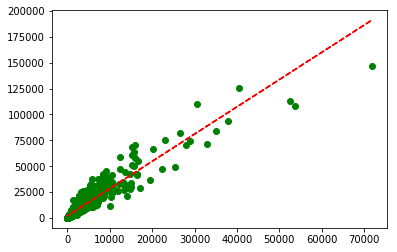

In [96]:
#Make scatter plot with trendline
plt.scatter(x,y, color = 'green')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x,p(x),"r--")

#### Trendline source: https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas

In [97]:
from scipy.stats import pearsonr

In [98]:
#Pearson correlation to determine strength of the linear correlation
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.930


#### Pearsonr source: https://www.geeksforgeeks.org/python-pearson-correlation-test-between-two-variables/

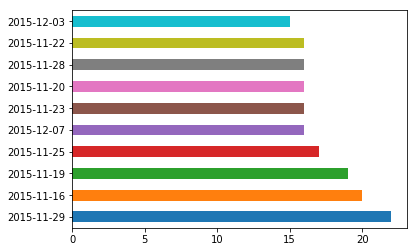

In [100]:
df_final['date'].value_counts().nlargest(10).plot('barh')